# Decision Tree

# 1.1

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

#na_value=“?”
df = pd.read_csv('D2.csv')

from sklearn.preprocessing import StandardScaler

# mapping
df['age']=df['age'].astype(str)
age_map = {'[80-90)':2, '[70-80)':3, '[50-60)':5, '[40-50)':6, '[60-70)':4, 
'[90-100)':1, '[30-40)':7,'[10-20)':9, '[20-30)':8, '[0-10)':10}
df['age'] = df['age'].map(age_map)
# admission_source_id
# discharge_disposition_id 
# admission_type_id
# readmitted
df['readmitted'] = df['readmitted'].astype(bool)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_type_id'] = df['admission_type_id'].astype(str)

y = df['readmitted']
X = df.drop(['readmitted'], axis=1)
X_mat = pd.get_dummies(X)
X_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 151 entries, age to insulin_Up
dtypes: bool(2), int64(9), uint8(140)
memory usage: 4.1 MB


In [2]:
X_mat

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,...,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,2,1,33,0,14,0,1,1,9,False,...,0,0,1,0,0,1,0,0,1,0
1,3,3,48,2,7,0,0,2,9,False,...,0,0,1,0,0,1,0,0,1,0
2,5,3,25,1,15,0,0,0,8,False,...,0,0,1,0,0,1,0,0,1,0
3,5,6,41,0,19,0,0,0,9,False,...,0,0,1,0,0,1,0,0,1,0
4,2,4,22,0,12,0,0,1,8,False,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,4,51,0,12,3,0,2,6,True,...,0,0,0,1,0,1,0,0,1,0
19996,5,9,57,2,28,3,5,5,9,False,...,0,0,1,0,0,1,0,1,0,0
19997,2,3,41,0,18,0,0,0,7,True,...,0,0,1,0,0,1,0,0,1,0
19998,5,3,49,0,15,0,0,5,9,False,...,0,0,1,0,0,1,0,0,1,0


In [3]:
from sklearn.model_selection import train_test_split
# setting random state
rs = 10

x_train, x_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [4]:
#from sklearn.preprocesses import Standardscale

1.2

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(x_train, y_train)

# print model parameters
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


# a

In [6]:
print("Train accuracy:", model.score(x_train, y_train))

Train accuracy: 1.0


In [7]:
print("Test accuracy:", model.score(x_test, y_test))

Test accuracy: 0.5621666666666667


# b

In [8]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.59      0.58      0.58      3203
        True       0.53      0.54      0.54      2797

    accuracy                           0.56      6000
   macro avg       0.56      0.56      0.56      6000
weighted avg       0.56      0.56      0.56      6000



In [9]:
treeObj = model.tree_
print(treeObj.node_count)
print(treeObj.n_leaves)

7583
3792


In [10]:
model.get_params(deep = True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

# c

[Text(0.5, 0.75, 'number_inpatient <= 0.5\ngini = 0.498\nsamples = 14000\nvalue = [7474, 6526]\nclass = age'),
 Text(0.25, 0.25, '\n  (...)  \n'),
 Text(0.75, 0.25, '\n  (...)  \n')]

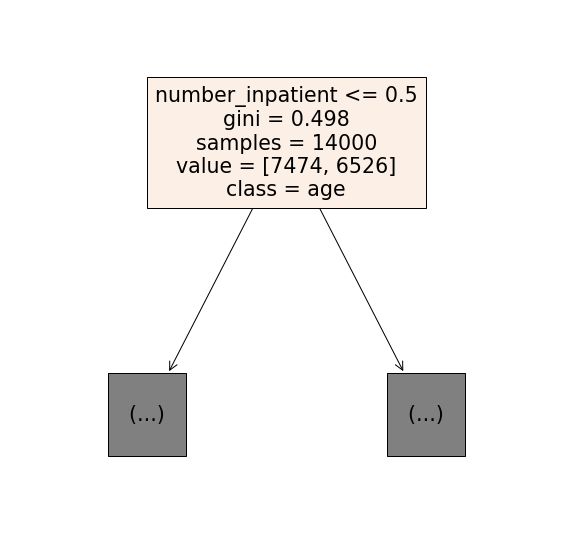

In [11]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(model, feature_names=x_train.columns,class_names=x_test.columns,max_depth=0,filled=True)

importances = model.feature_importances_

In [12]:
import numpy as np
importances = model.feature_importances_
feature_names = X_mat.columns
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
indices = indices[:5]
for i in indices:
    print(feature_names[i], ':', importances[i])

num_lab_procedures : 0.14534840757421408
num_medications : 0.10777204974657265
time_in_hospital : 0.0751300449964696
number_inpatient : 0.06844337499695705
age : 0.06239044061434661


# 1.3 

In [13]:
from sklearn.model_selection import GridSearchCV

In [101]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(x_train, y_train)

result_set = cv_1.cv_results_
print(result_set)


{'mean_fit_time': array([0.19769864, 0.2028723 , 0.19982314, 0.19025519, 0.19936898,
       0.21004753, 0.20372205, 0.21942911, 0.23339312, 0.22932453,
       0.23526745, 0.24505534, 0.25690227, 0.24213126, 0.24746559,
       0.23688312, 0.26892121, 0.26440556, 0.25147433, 0.25708146,
       0.28719189, 0.28174706, 0.32974763, 0.29779866, 0.29346771,
       0.28130746, 0.28794823, 0.29517965, 0.3194705 , 0.33600385,
       0.32059889, 0.32726562, 0.35240541, 0.37974   , 0.33907492,
       0.36011786, 0.3521724 , 0.35226402, 0.34953842, 0.33423972,
       0.36080332, 0.38745754, 0.406832  , 0.37963834, 0.37516181,
       0.42886772, 0.39110415, 0.36416321, 0.39207063, 0.3752084 ,
       0.35611675, 0.35633426, 0.37933228, 0.37259576, 0.3669354 ,
       0.35907297, 0.38762059, 0.37962458, 0.3713958 , 0.3588546 ,
       0.18778307, 0.19420075, 0.18735545, 0.18719058, 0.20777495,
       0.20427718, 0.20715179, 0.22531238, 0.22399957, 0.22561369,
       0.22343655, 0.22551162, 0.24278669, 0

In [15]:
print("Train accuracy:", cv_1.score(x_train, y_train))
print("Test accuracy:", cv_1.score(x_test, y_test))

Train accuracy: 0.647
Test accuracy: 0.6285


In [16]:
cv_1_best = cv_1.best_estimator_
print(cv_1_best)
print('Nodes: ',cv_1_best.tree_.node_count)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=10)
Nodes:  63


In [17]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


[Text(0.5, 0.75, 'number_inpatient <= 0.5\ngini = 0.498\nsamples = 14000\nvalue = [7474, 6526]\nclass = age'),
 Text(0.25, 0.25, '\n  (...)  \n'),
 Text(0.75, 0.25, '\n  (...)  \n')]

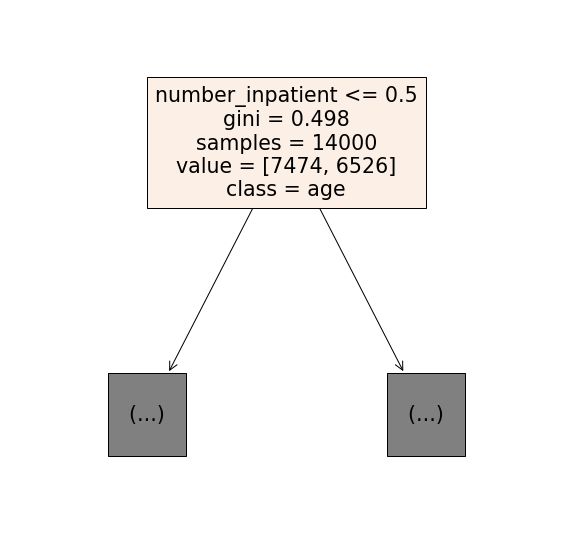

In [18]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(cv_1_best, feature_names=x_train.columns,class_names=x_test.columns,max_depth=0,filled=True)

In [115]:
import numpy as np

importances = cv_1_best.feature_importances_
feature_names = X_mat.columns
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
indices = indices[:20]

for i in indices:
    if i > 0:
        print(feature_names[i], ':', importances[i])
    

number_inpatient : 0.5398686523856943
discharge_disposition_id_11 : 0.14801770955917629
number_outpatient : 0.043712573966404364
i:  0
number_emergency : 0.03226587719022525
diabetesMed : 0.029977988441482913
num_lab_procedures : 0.02676519159464824
admission_source_id_7 : 0.02373326605965202
discharge_disposition_id_14 : 0.02368322338351228
medical_specialty_Invalid : 0.02242552668694245
num_medications : 0.01827975557133852
medical_specialty_InternalMedicine : 0.013177564979311144
discharge_disposition_id_13 : 0.009424096740539515
admission_source_id_1 : 0.008783533284369944
admission_type_id_1 : 0.007701621020048438
time_in_hospital : 0.0054633140325778436
race_AfricanAmerican : 0.004342593498465718
glipizide_Steady : 0.0031803209502603144
insulin_Up : 0.0002804670969380875
chlorpropamide_No : 0.0


In [116]:
import numpy as np

importances = cv_1_best.feature_importances_
feature_names = X_mat.columns
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
indices = indices[:5]
for i in range(len(indices)):
    print(feature_names[i], ':', importances[i])

age : 0.03891672355841245
time_in_hospital : 0.0054633140325778436
num_lab_procedures : 0.02676519159464824
num_procedures : 0.0
num_medications : 0.01827975557133852


In [20]:
!pip install pydot

In [21]:
print(cv_1_best)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=10)


In [22]:
# import pydot
# from io import StringIO
# from sklearn.tree import export_graphviz

# # visualize
# dotfile = StringIO()
# export_graphviz(cv_1_best, out_file=dotfile, feature_names=X_mat.columns)
# graph = pydot.graph_from_dot_data(dotfile.getvalue())
# graph[0].write_png("dt_viz1.png") # saved in the following file - will return True if successful

In [23]:
# # plot max depth hyperparameter values vs training and test accuracy score
# plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
# plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
# plt.ylabel('score')
# plt.show()

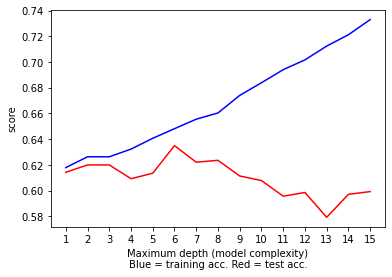

In [24]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

In [25]:
print(cv_1.best_estimator_)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=10)


# 1.4

In [26]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(x_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.37531276063386154 	 0.6246872393661385 	 True
0.6264775413711584 	 0.3735224586288416 	 False
0.6643502432244615 	 0.33564975677553854 	 False
0.6333333333333333 	 0.36666666666666664 	 False
0.6643502432244615 	 0.33564975677553854 	 True
0.37531276063386154 	 0.6246872393661385 	 True
0.2891942535915053 	 0.7108057464084947 	 True
0.6807359307359307 	 0.31926406926406925 	 False
0.528235294117647 	 0.4717647058823529 	 True
0.6643502432244615 	 0.33564975677553854 	 True
0.528235294117647 	 0.4717647058823529 	 True
0.6807359307359307 	 0.31926406926406925 	 True
0.528235294117647 	 0.4717647058823529 	 True
0.7937293729372937 	 0.20627062706270627 	 False
0.6264775413711584 	 0.3735224586288416 	 False
0.6643502432244615 	 0.33564975677553854 	 True
0.626477541371158

In [27]:
!pip install pydot

In [28]:
# import pydot
# from io import StringIO
# from sklearn.tree import export_graphviz

# # visualize
# dotfile = StringIO()
# export_graphviz(cv_1.best_estimator_, out_file=dotfile, feature_names=X_mat.columns)
# graph = pydot.graph_from_dot_data(dotfile.getvalue())
# graph[].write_png("dt_viz.png") # saved in the following file - will return True if successful

In [29]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(x_test)
# y_pred_proba_dt_small = model_small.predict_proba(x_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(x_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
# roc_index_dt_small = roc_auc_score(y_test, y_pred_proba_dt_small[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
# print("ROC index on test for DT_small:", roc_index_dt_small)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.5610704055937905
ROC index on test for DT_optimal: 0.6679103240604676


In [30]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
# fpr_dt_small, tpr_dt_small, thresholds_dt_small = roc_curve(y_test, y_pred_proba_dt_small[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

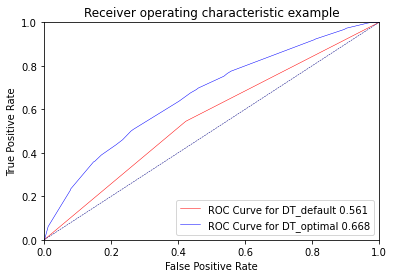

In [31]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [32]:
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

# Regression

# 1

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

#na_value=“?”
df = pd.read_csv('D2.csv')

from sklearn.preprocessing import StandardScaler

# mapping
df['age']=df['age'].astype(str)
age_map = {'[80-90)':2, '[70-80)':3, '[50-60)':5, '[40-50)':6, '[60-70)':4, 
'[90-100)':1, '[30-40)':7,'[10-20)':9, '[20-30)':8, '[0-10)':10}
df['age'] = df['age'].map(age_map)
# admission_source_id
# discharge_disposition_id 
# admission_type_id
# readmitted
df['readmitted'] = df['readmitted'].astype(bool)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_type_id'] = df['admission_type_id'].astype(str)

y = df['readmitted']
X = df.drop(['readmitted'], axis=1)
X_mat = pd.get_dummies(X)

In [34]:
from sklearn.model_selection import train_test_split
# setting random state
rs = 10

x_train, x_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standardlize = scaler.fit_transform(x_train, y_train)
x_test = scaler.transform(x_test)

# 2

In [36]:
from sklearn.linear_model import LogisticRegression

Rmodel = LogisticRegression(random_state=rs)
# fit it to training data
Rmodel.fit(x_standardlize, y_train)

LogisticRegression(random_state=10)

In [37]:
Rmodel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
print("Train accuracy:", Rmodel.score(x_standardlize, y_train))
print("Test accuracy:", Rmodel.score(x_test, y_test))
# classification report on test data
y_pred = Rmodel.predict(x_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6513571428571429
Test accuracy: 0.6401666666666667
              precision    recall  f1-score   support

       False       0.64      0.74      0.69      3203
        True       0.64      0.53      0.58      2797

    accuracy                           0.64      6000
   macro avg       0.64      0.63      0.63      6000
weighted avg       0.64      0.64      0.64      6000



In [39]:
feature_names = X_mat.columns
coef = Rmodel.coef_[0]
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
indices = len(indices)
rank = {}
for i in range(indices):
    rank[feature_names[i]] = coef[i]
rank = sorted(rank.items(), key = lambda x:abs(x[1]), reverse = True)
rank

[('discharge_disposition_id_11', -1.0330682180913198),
 ('number_inpatient', 0.5699699405604234),
 ('discharge_disposition_id_14', -0.22378741661661344),
 ('number_emergency', 0.2177050360642632),
 ('diabetesMed', 0.19542590274372462),
 ('discharge_disposition_id_13', -0.14583902142496746),
 ('discharge_disposition_id_1', 0.13918116130207542),
 ('admission_type_id_7', -0.13860344795271087),
 ('discharge_disposition_id_18', 0.1355958283173684),
 ('number_outpatient', 0.13027332781809495),
 ('num_medications', 0.12919870815896603),
 ('medical_specialty_Surgery-Plastic', 0.12740149964075187),
 ('discharge_disposition_id_19', -0.11746575025645231),
 ('discharge_disposition_id_6', 0.11148736443814884),
 ('medical_specialty_Endocrinology-Metabolism', -0.11040808198664952),
 ('medical_specialty_Surgeon', -0.10570075185869479),
 ('discharge_disposition_id_22', 0.1022006582820588),
 ('medical_specialty_InternalMedicine', -0.10204774723512622),
 ('medical_specialty_Obstetrics', -0.10072612719681

In [40]:
# feature_names = sorted(feature_names.items(), key = lambda x:abs(x[1]), reverse = True)

In [41]:
feature_names

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'change',
       ...
       'glipizide_Up', 'glyburide_Down', 'glyburide_No', 'glyburide_Steady',
       'glyburide_Up', 'tolbutamide_No', 'insulin_Down', 'insulin_No',
       'insulin_Steady', 'insulin_Up'],
      dtype='object', length=151)

In [43]:
feature_names = X_mat.columns
coef = Rmodel.coef_[0]
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
indices = indices[:5]
for i in indices:
    print(feature_names[i], ':', coef[i])

discharge_disposition_id_11 : -1.0330682180913198
number_inpatient : 0.5699699405604234
discharge_disposition_id_14 : -0.22378741661661344
number_emergency : 0.2177050360642632
diabetesMed : 0.19542590274372462


# 2 - GCV

In [44]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
lr = GridSearchCV(param_grid=params, estimator=LogisticRegression
                  (random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
lr.fit(x_standardlize, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [45]:
lr.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 10,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(random_state=10),
 'n_jobs': -1,
 'param_grid': {'C': [1e-06,
   1e-05,
   0.0001,
   0.001,
   0.01,
   0.1,
   1,
   10,
   100,
   1000]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': None,
 'verbose': 0}

In [46]:
result_set = lr.cv_results_
print(result_set)

{'mean_fit_time': array([0.30008879, 0.31671615, 0.30737574, 0.36919575, 0.61717913,
       0.88612049, 1.19157991, 0.98405838, 1.08758612, 0.88101828]), 'std_fit_time': array([0.03493577, 0.02282588, 0.02822186, 0.02985525, 0.05088812,
       0.06028032, 0.21950423, 0.12384314, 0.11262203, 0.19673267]), 'mean_score_time': array([0.00363457, 0.00390134, 0.00420189, 0.00435205, 0.00390122,
       0.00430114, 0.00475228, 0.00400081, 0.00444188, 0.0020026 ]), 'std_score_time': array([0.00086134, 0.00083103, 0.00059994, 0.00148525, 0.00070037,
       0.00090133, 0.00248273, 0.00077531, 0.00047169, 0.00080695]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

Total number of models:  10


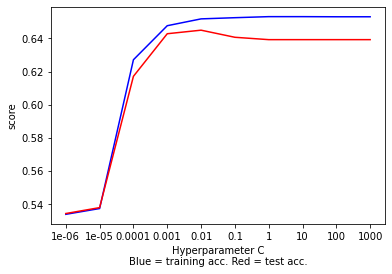

In [47]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


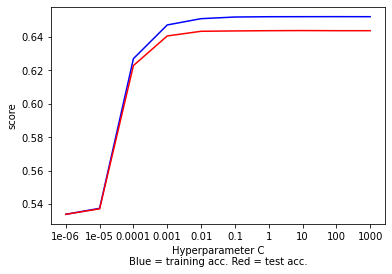

In [48]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [49]:
lr.best_estimator_

LogisticRegression(C=10, random_state=10)

In [50]:
lr.best_estimator_.score

<bound method ClassifierMixin.score of LogisticRegression(C=10, random_state=10)>

In [51]:
lr.best_estimator_.fit(x_standardlize, y_train)

print("Train accuracy:", lr.score(x_standardlize, y_train))
print("Test accuracy:", lr.score(x_test, y_test))

Train accuracy: 0.6513571428571429
Test accuracy: 0.6401666666666667


In [52]:
lr.cv_results_['rank_test_score']

array([10,  9,  8,  7,  6,  5,  2,  1,  3,  3])

In [53]:
lr.cv_results_['split8_test_score'] 

array([0.53357143, 0.54      , 0.63857143, 0.66142857, 0.665     ,
       0.66785714, 0.66785714, 0.66785714, 0.66785714, 0.66785714])

In [54]:
lr.best_params_

{'C': 10}

In [55]:
lr_best = lr.best_estimator_

In [56]:
print("Train score: ", lr_best.score(x_standardlize, y_train))
print("Test score: ", lr_best.score(x_test, y_test))

Train score:  0.6513571428571429
Test score:  0.6401666666666667


In [57]:
feature_names = X_mat.columns
coef =lr_best.coef_[0]
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
indices = indices[:5]
for i in indices:
    print(feature_names[i], ':', coef[i])

discharge_disposition_id_11 : -1.3699129416525566
number_inpatient : 0.5703245388147229
discharge_disposition_id_14 : -0.21863786846694327
number_emergency : 0.217932669552588
diabetesMed : 0.19556838399946014


# Recursive feature elimination

In [58]:
from sklearn.model_selection import train_test_split

rs = 10

x_train, x_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standardlize = scaler.fit_transform(x_train, y_train)
x_test = scaler.fit_transform(x_test,y_test)

In [60]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=9), cv=10)
rfe_model = rfe.fit(x_standardlize, y_train) # run the RFECV

print("Original feature set", x_standardlize.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 151
Number of features after elimination 59


In [61]:
rfe_model.support_

array([ True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [62]:
X_train_sel = rfe.transform(x_standardlize)
X_test_sel = rfe.transform(x_test)

In [63]:
len(X_train_sel)

14000

In [64]:
from sklearn.model_selection import GridSearchCV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))
y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))
print(rfe_cv.best_params_)

Train accuracy: 0.6502142857142857
Test accuracy: 0.6373333333333333
              precision    recall  f1-score   support

       False       0.63      0.77      0.69      3203
        True       0.65      0.48      0.55      2797

    accuracy                           0.64      6000
   macro avg       0.64      0.63      0.62      6000
weighted avg       0.64      0.64      0.63      6000

{'C': 1000}


In [65]:
rfe_cv.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 10,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(random_state=10),
 'n_jobs': -1,
 'param_grid': {'C': [1e-06,
   1e-05,
   0.0001,
   0.001,
   0.01,
   0.1,
   1,
   10,
   100,
   1000]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [66]:
rfe_cv.best_estimator_

LogisticRegression(C=1000, random_state=10)

In [67]:
rfe_cv_best = rfe_cv.best_estimator_

In [68]:
print(rfe_cv_best)

LogisticRegression(C=1000, random_state=10)


In [69]:
rfe_cv_best.coef_[0]

array([-0.09722155, -0.05697456,  0.13488281,  0.13099153,  0.2223203 ,
        0.57336602,  0.08211262,  0.19163202,  0.04787678, -0.03820273,
        0.0483502 ,  0.11053224,  0.06056812, -0.28927921,  0.0479212 ,
       -2.28171127, -0.16088602, -0.23848119,  0.277763  , -0.26650313,
        0.06860804, -0.21505316, -0.12431528,  0.05515607,  0.04122897,
        0.18347015,  0.10267482,  0.16478924, -0.17786521, -0.04866468,
        0.18715541, -0.20497916, -0.23272043,  0.0680272 , -0.1255088 ,
       -0.09501417,  0.08548757, -0.1224084 , -0.21133755, -0.05753804,
       -0.03926045, -0.1383316 , -0.12222466,  0.10307977,  0.04968447,
        0.1175158 , -0.22859941, -0.05490193, -0.13878273, -0.04081168,
        0.28331508,  0.05591619,  0.06032452,  0.0928394 ,  0.06990506,
        0.05741604, -0.0817253 ,  0.0817253 , -0.10094263])

In [70]:
# X_mat.columns

In [71]:
sf=[]
for i in range(0,len(rfe_model.support_),1):
    if rfe_model.support_[i] == True:
        sf.append(X_mat.columns[i])
        
print(len(sf),'\n')
# print(sf)

59 



In [72]:
coef = rfe_cv_best.coef_[0]
feature_name = sf
rank_coef={}

for i in range(len(coef)):
    rank_coef[feature_name[i]] = coef[i]
    
rank_coef = sorted(rank_coef.items(), key = lambda x:abs(x[1]), reverse = True)

rank_coef[:3]

[('discharge_disposition_id_11', -2.281711270508471),
 ('number_inpatient', 0.5733660161092993),
 ('admission_type_id_7', -0.28927921342453167)]

In [73]:
rank_coef[:10]

[('discharge_disposition_id_11', -2.281711270508471),
 ('number_inpatient', 0.5733660161092993),
 ('admission_type_id_7', -0.28927921342453167),
 ('medical_specialty_Surgery-Plastic', 0.28331507672031486),
 ('discharge_disposition_id_18', 0.2777630009289721),
 ('discharge_disposition_id_19', -0.2665031331758215),
 ('discharge_disposition_id_14', -0.23848118954319275),
 ('medical_specialty_Endocrinology-Metabolism', -0.2327204262341818),
 ('medical_specialty_Surgeon', -0.2285994093842307),
 ('number_emergency', 0.22232030198605424)]

In [74]:
print(len(coef),len(feature_name))

59 59


Total number of models:  10


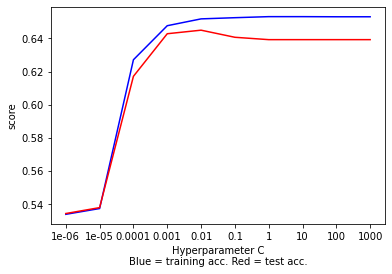

In [75]:
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

# Curve

In [76]:
from sklearn.metrics import roc_auc_score

lr_pred = lr_best.predict_proba(x_test)
rfe_pred = rfe_cv_best.predict_proba(X_test_sel)
roc_index_dt_small = roc_auc_score(y_test,lr_pred[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, rfe_pred[:, 1])
print("ROC index on test for DT_Grid:", roc_index_dt_small)
print("ROC index on test for DT_RFE:", roc_index_dt_cv)

ROC index on test for DT_Grid: 0.6868878847603432
ROC index on test for DT_RFE: 0.6863546654900198


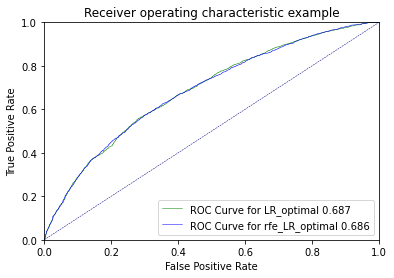

In [77]:
from sklearn.metrics import roc_curve

fpr_Grid, tpr_Grid, thresholds_Grid = roc_curve(y_test, lr_pred[:,1])
fpr_rfe_Grid, tpr_ref_Grid, thresholds_rfe_Grid = roc_curve(y_test, rfe_pred[:,1])
plt.plot(fpr_Grid, tpr_Grid, label='ROC Curve for LR_optimal {:.3f}'.format(roc_index_dt_small), color='green', lw=0.5)
plt.plot(fpr_rfe_Grid, tpr_ref_Grid, label='ROC Curve for rfe_LR_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# NN

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('D2.csv')

from sklearn.preprocessing import StandardScaler

# mapping
df['age']=df['age'].astype(str)
age_map = {'[80-90)':2, '[70-80)':3, '[50-60)':5, '[40-50)':6, '[60-70)':4, 
'[90-100)':1, '[30-40)':7,'[10-20)':9, '[20-30)':8, '[0-10)':10}
df['age'] = df['age'].map(age_map)
df['readmitted'] = df['readmitted'].astype(bool)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_type_id'] = df['admission_type_id'].astype(str)

y = df['readmitted']
X = df.drop(['readmitted'], axis=1)
X_mat = pd.get_dummies(X)
rs = 10
x_train, x_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
scaler = StandardScaler()
x_standardlize = scaler.fit_transform(x_train, y_train)
x_test = scaler.transform(x_test)

# 3.2

In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(x_standardlize, y_train)
print("Train accuracy:", model_1.score(x_standardlize, y_train))
print("Test accuracy:", model_1.score(x_test, y_test))
y_pred = model_1.predict(x_test)
print(classification_report(y_test, y_pred))
print(model_1)

Train accuracy: 0.8404285714285714
Test accuracy: 0.582
              precision    recall  f1-score   support

       False       0.60      0.64      0.62      3203
        True       0.56      0.52      0.54      2797

    accuracy                           0.58      6000
   macro avg       0.58      0.58      0.58      6000
weighted avg       0.58      0.58      0.58      6000

MLPClassifier(random_state=10)


C:\Users\John\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
model_1.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [51]:
# new parameters
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_2.fit(x_standardlize, y_train)

print("Train accuracy:", cv_2.score(x_standardlize, y_train))
print("Test accuracy:", cv_2.score(x_test, y_test))

y_pred = cv_2.predict(x_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.6621428571428571
Test accuracy: 0.631
              precision    recall  f1-score   support

       False       0.64      0.71      0.67      3203
        True       0.62      0.54      0.58      2797

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000

{'hidden_layer_sizes': (3,)}


In [52]:
cv_2_best = cv_2.best_estimator_
print("original")
print(cv_2_best.n_iter_)
print(cv_2_best.n_layers_)
print(cv_2_best.out_activation_)
print(cv_2_best.n_features_in_)

original
118
3
logistic
151


# 3.3

In [53]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
print(dt_best.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5}


In [54]:
from sklearn.feature_selection import SelectFromModel
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(x_train)
X_test_sel_model = selectmodel.transform(x_test)
print(X_train_sel_model.shape)

(14000, 15)


C:\Users\John\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [55]:
params = {'hidden_layer_sizes': [(3), (5),(7),(9)], 'alpha': [0.01,0.001]}

rfe_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv = 10, n_jobs=-1, verbose = 10, return_train_score = True)
rfe_cv.fit(X_train_sel_model, y_train)

print("Train accuracy:", rfe_cv.score(X_train_sel_model, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel_model, y_test))

y_pred = rfe_cv.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(rfe_cv.best_params_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Train accuracy: 0.6457857142857143
Test accuracy: 0.5698333333333333
              precision    recall  f1-score   support

       False       0.56      0.98      0.71      3203
        True       0.80      0.10      0.18      2797

    accuracy                           0.57      6000
   macro avg       0.68      0.54      0.45      6000
weighted avg       0.67      0.57      0.46      6000

{'alpha': 0.01, 'hidden_layer_sizes': 5}


In [56]:
# rfe_cv.cv_results_

In [57]:
rfe_cv_best = rfe_cv.best_estimator_

In [58]:
# feature_names = X_mat.columns
# coef =rfe_cv_best.coefs_[0]
# indices = np.argsort(np.absolute(coef))
# indices = np.flip(indices, axis=0)
# indices = indices[:5]
# for i in indices:
#     print(feature_names[i], ':', coef[i])

In [59]:
rfe_cv_best = rfe_cv.best_estimator_
print('Feature selection')
print(rfe_cv_best.n_iter_)
print(rfe_cv_best.n_layers_)
print(rfe_cv_best.out_activation_)
print(rfe_cv_best.n_features_in_)

Feature selection
102
3
logistic
15


In [62]:
result_set["split0_test_score"]

array([0.63285714, 0.63642857, 0.63571429, 0.63428571, 0.635     ,
       0.63714286, 0.63357143, 0.64428571])

Total number of models:  8


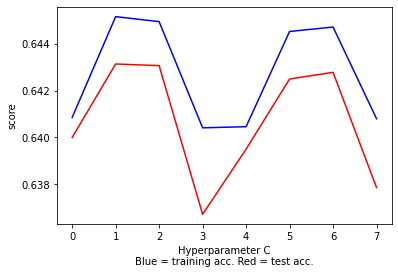

In [63]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)))
plt.ylabel('score')
plt.show()

Total number of models:  8


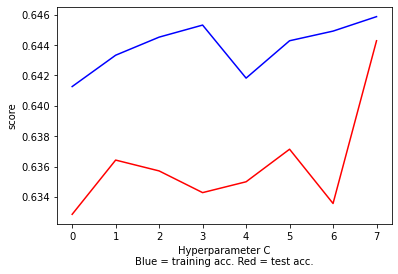

In [64]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)))
plt.ylabel('score')
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(x_test)
y_pred_proba_cv_2 = cv_2.predict_proba(x_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel_model)

roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with feature selection and gridsearch:", roc_index_rfe_cv)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])


ROC index on test for NN_default: 0.6099888924744421
ROC index on test for NN with gridsearch 2: 0.6810140453103549
ROC index on test for NN with feature selection and gridsearch: 0.6622198798922756


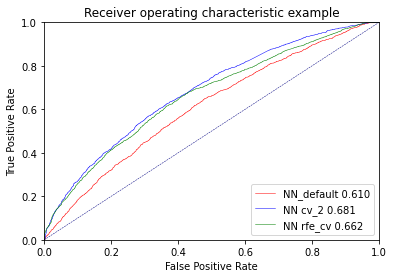

In [66]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='blue', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='NN rfe_cv {:.3f}'.format(roc_index_rfe_cv), color='green', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Final remark

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('D2.csv')

from sklearn.preprocessing import StandardScaler

# mapping
df['age']=df['age'].astype(str)
age_map = {'[80-90)':2, '[70-80)':3, '[50-60)':5, '[40-50)':6, '[60-70)':4, 
'[90-100)':1, '[30-40)':7,'[10-20)':9, '[20-30)':8, '[0-10)':10}
df['age'] = df['age'].map(age_map)
df['readmitted'] = df['readmitted'].astype(bool)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_type_id'] = df['admission_type_id'].astype(str)

y = df['readmitted']
X = df.drop(['readmitted'], axis=1)
X_mat = pd.get_dummies(X)
rs = 10
x_train, x_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
scaler = StandardScaler()
x_standardlize = scaler.fit_transform(x_train, y_train)
x_test = scaler.transform(x_test)

In [35]:
# Dtree
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

tree = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
tree.fit(x_train, y_train)

result_tree = tree.cv_results_
print(result_tree)


{'mean_fit_time': array([0.1987009 , 0.19722965, 0.19504879, 0.2264746 , 0.22801077,
       0.22732692, 0.22783573, 0.22334597, 0.248667  , 0.24038303,
       0.23051128, 0.2501683 , 0.26458278, 0.26707926, 0.26011839,
       0.25329435, 0.26865587, 0.26224489, 0.25962238, 0.25859759,
       0.27466128, 0.27327411, 0.27363355, 0.27403655, 0.29539573,
       0.29588742, 0.31899035, 0.31350958, 0.29851229, 0.3093415 ,
       0.30403137, 0.34268475, 0.32267776, 0.31352992, 0.31231422,
       0.30956798, 0.33936138, 0.33889744, 0.32316673, 0.37895467,
       0.37401834, 0.37229846, 0.36517727, 0.34764657, 0.39172068,
       0.38966496, 0.37383595, 0.38269086, 0.41629617, 0.36060216,
       0.34748797, 0.38869667, 0.45369213, 0.43463738, 0.37918253,
       0.37861223, 0.4117352 , 0.39297466, 0.39381654, 0.37929733,
       0.19385202, 0.21376269, 0.18975241, 0.20934787, 0.2186368 ,
       0.19883411, 0.19884746, 0.1985599 , 0.22036405, 0.239854  ,
       0.22363076, 0.22899652, 0.25031145, 0

In [36]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=9), cv=10)
rfe_model = rfe.fit(x_standardlize, y_train) # run the RFECV

print("Original feature set", x_standardlize.shape[1])
print("Number of features after elimination", rfe.n_features_)
X_train_sel = rfe.transform(x_standardlize)
X_test_sel = rfe.transform(x_test)

C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Original feature set 151
Number of features after elimination 59


In [37]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

regression = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
regression.fit(X_train_sel, y_train)
print("Train accuracy:", regression.score(X_train_sel, y_train))
print("Test accuracy:", regression.score(X_test_sel, y_test))
y_pred = regression.predict(X_test_sel)
print(classification_report(y_test, y_pred))
print(regression.best_params_)

Train accuracy: 0.6502142857142857
Test accuracy: 0.6398333333333334
              precision    recall  f1-score   support

       False       0.64      0.74      0.69      3203
        True       0.64      0.52      0.58      2797

    accuracy                           0.64      6000
   macro avg       0.64      0.63      0.63      6000
weighted avg       0.64      0.64      0.64      6000

{'C': 1000}


In [38]:
params = {'hidden_layer_sizes': [(3,5,7,9), (5,5,7,9)], 'alpha': [0.01,0.001]}

NN = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv = 10, n_jobs=-1, verbose = 10, return_train_score = True)
NN.fit(X_train_sel, y_train)

print("Train accuracy:", NN.score(X_train_sel, y_train))
print("Test accuracy:", NN.score(X_test_sel, y_test))

y_pred = NN.predict(X_test_sel)
print(classification_report(y_test, y_pred))

print(NN.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Train accuracy: 0.6536428571428572
Test accuracy: 0.638
              precision    recall  f1-score   support

       False       0.65      0.69      0.67      3203
        True       0.62      0.57      0.60      2797

    accuracy                           0.64      6000
   macro avg       0.64      0.63      0.63      6000
weighted avg       0.64      0.64      0.64      6000

{'alpha': 0.001, 'hidden_layer_sizes': (3, 5, 7, 9)}


In [39]:
NN_best = NN.best_estimator_
print('Feature selection')
print(NN_best.n_iter_)
print(NN_best.n_layers_)
print(NN_best.out_activation_)
print(NN_best.n_features_in_)

Feature selection
128
6
logistic
59


In [40]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = tree.predict_proba(x_test)
y_pred_proba_cv_2 = regression.predict_proba(X_test_sel)
y_pred_proba_rfe_cv = NN.predict_proba(X_test_sel)

roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for DTree:", roc_index_nn_1)
print("ROC index on test for Regression:", roc_index_cv_2)
print("ROC index on test for NN:", roc_index_rfe_cv)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])


ROC index on test for DTree: 0.6159844559383066
ROC index on test for Regression: 0.686657273286094
ROC index on test for NN: 0.6912902645010917


C:\Users\John\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


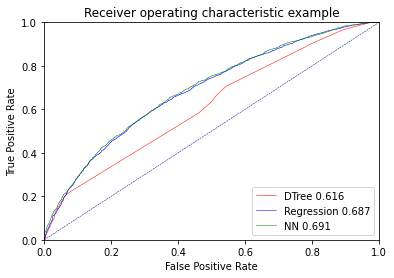

In [45]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='DTree {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='Regression {:.3f}'.format(roc_index_cv_2), color='blue', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='NN {:.3f}'.format(roc_index_rfe_cv), color='green', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [44]:
print("DTree Train accuracy      :", tree.score(x_train, y_train))
print("DTree Test accuracy       :", tree.score(x_test, y_test),'\n')

print("Regression Train accuracy :", regression.score(X_train_sel, y_train))
print("Regression Test accuracy  :", regression.score(X_test_sel, y_test),'\n')

print("NN Train accuracy         :", NN.score(X_train_sel, y_train))
print("NN Test accuracy          :", NN.score(X_test_sel, y_test))

DTree Train accuracy      : 0.647
DTree Test accuracy       : 0.5948333333333333 

Regression Train accuracy : 0.6502142857142857
Regression Test accuracy  : 0.6398333333333334 

NN Train accuracy         : 0.6536428571428572
NN Test accuracy          : 0.638


C:\Users\John\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [69]:
rfe_cv_best = NN.best_estimator_
print('Feature selection')
print(rfe_cv_best.n_iter_)
print(rfe_cv_best.n_layers_)
print(rfe_cv_best.out_activation_)
print(rfe_cv_best.n_features_in_)

Feature selection
128
6
logistic
59
